In [20]:
!pip install lightgbm --quiet

import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Public URL for demonstration (Titanic dataset as a placeholder)
# Replace with the URL for the actual House Prices dataset if available.
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
print("Data Shape:", df.shape)
df.head()


Data Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Fill numeric columns with their median values only (numeric_only=True)
df.fillna(df.median(numeric_only=True), inplace=True)

# For demonstration, we use 'Fare' as the target variable.
# For the actual House Prices dataset, use 'SalePrice' and adjust columns as needed.
cols_to_drop = ['PassengerId'] if 'PassengerId' in df.columns else []
X = df.drop(['Fare'] + cols_to_drop, axis=1, errors='ignore')
y = df['Fare']

# Convert categorical columns using one-hot encoding
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [22]:
# Sanitize feature names by replacing special characters with underscores
X.columns = X.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

train_data = lgb.Dataset(X_train, label=y_train, feature_name=list(X.columns))
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data, feature_name=list(X.columns))

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbose': -1
}

model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[test_data])



In [19]:
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)


RMSE: 46.99692845254033


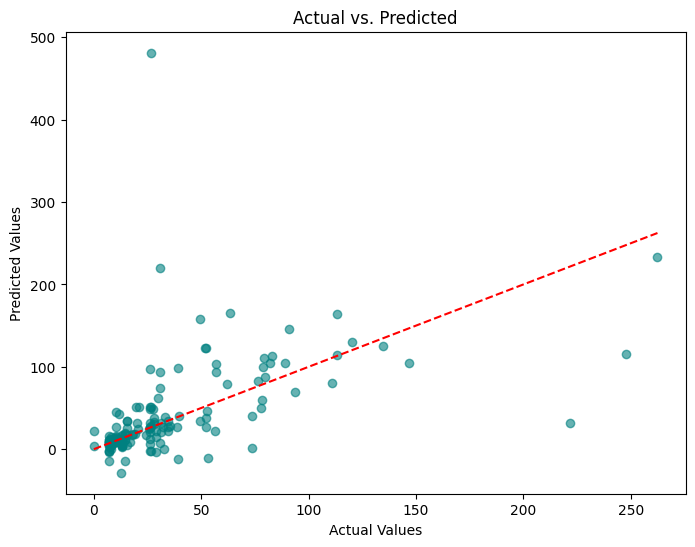

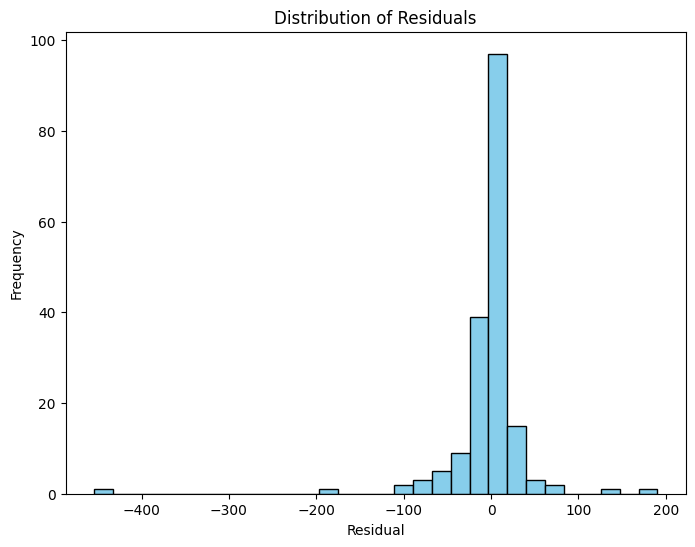

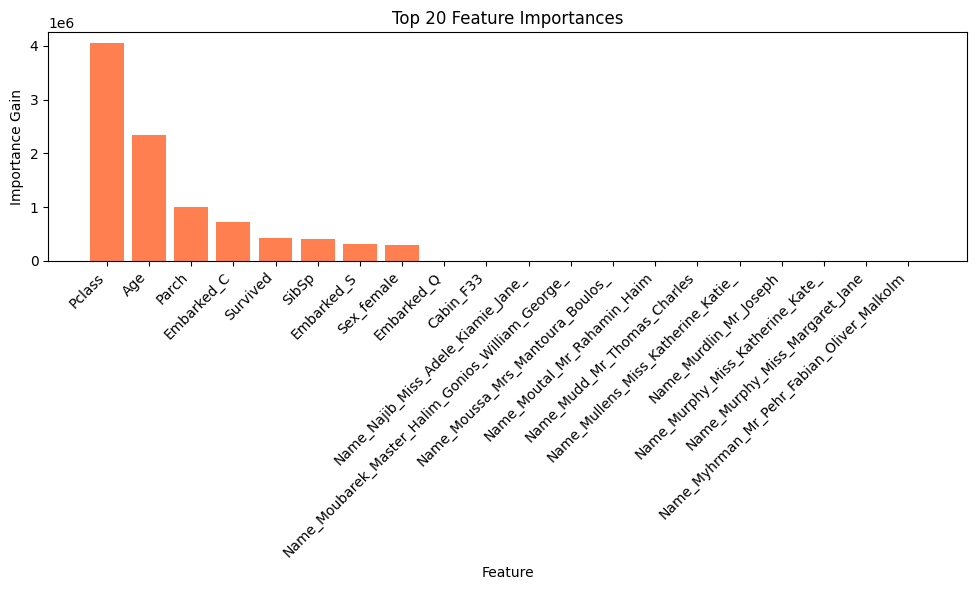

In [23]:
# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Histogram of Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

# Feature Importance Plot
feature_importance = model.feature_importance(importance_type='gain')
features = np.array(X.columns)
sorted_idx = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10,6))
plt.bar(features[sorted_idx][:20], feature_importance[sorted_idx][:20], color='coral')
plt.xlabel("Feature")
plt.ylabel("Importance Gain")
plt.title("Top 20 Feature Importances")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
